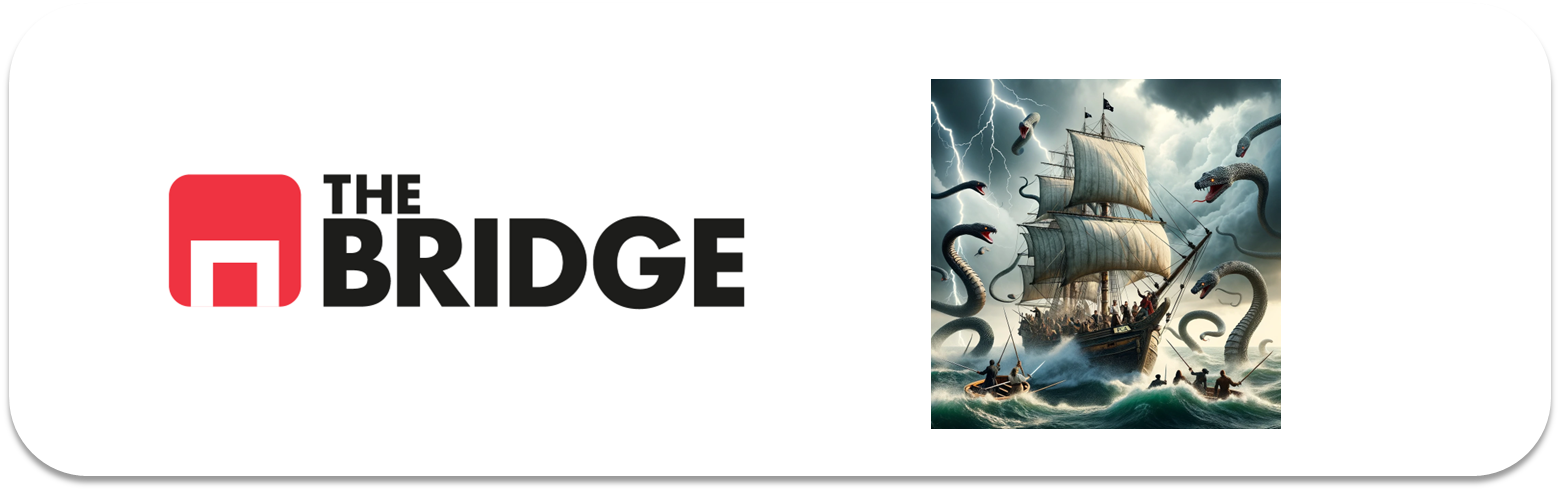

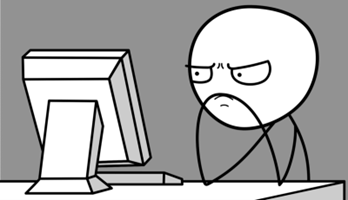

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [157]:
import Toolbox_ML as tlb
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [158]:
df = pd.read_csv("./data/nutrition.csv")
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [160]:
tlb.describe_df(df)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
Tipos,int64,object,object,object,object,object,object,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
% Faltante,0.0,0.0,0.0,0.0,87.67,81.9,91.51,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,8618,25,8614,8618,443,92,469,666,2642,2405,...,436,3735,830,906,554,803,309,641,643,936
% Cardinalidad,100.0,0.29,99.95,100.0,5.14,1.07,5.44,7.73,30.66,27.91,...,5.06,43.34,9.63,10.51,6.43,9.32,3.59,7.44,7.46,10.86


In [161]:
tlb.tipifica_variables(df, 5, 10)

,nombre_variable,tipo_sugerido
0,ID,Numérica Continua
1,FoodGroup,Numérica Discreta
2,ShortDescrip,Numérica Continua
3,Descrip,Numérica Continua
4,CommonName,Numérica Discreta
5,MfgName,Numérica Discreta
6,ScientificName,Numérica Discreta
7,Energy_kcal,Numérica Discreta
8,Protein_g,Numérica Continua
9,Fat_g,Numérica Continua


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

In [162]:
col_out = ["ID", 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName', 'ScientificName']
cat_col = ['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName', 'ScientificName']
num_col = [col for col in df.columns.to_list() if col not in col_out]

In [163]:
df[num_col]

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


<Axes: >

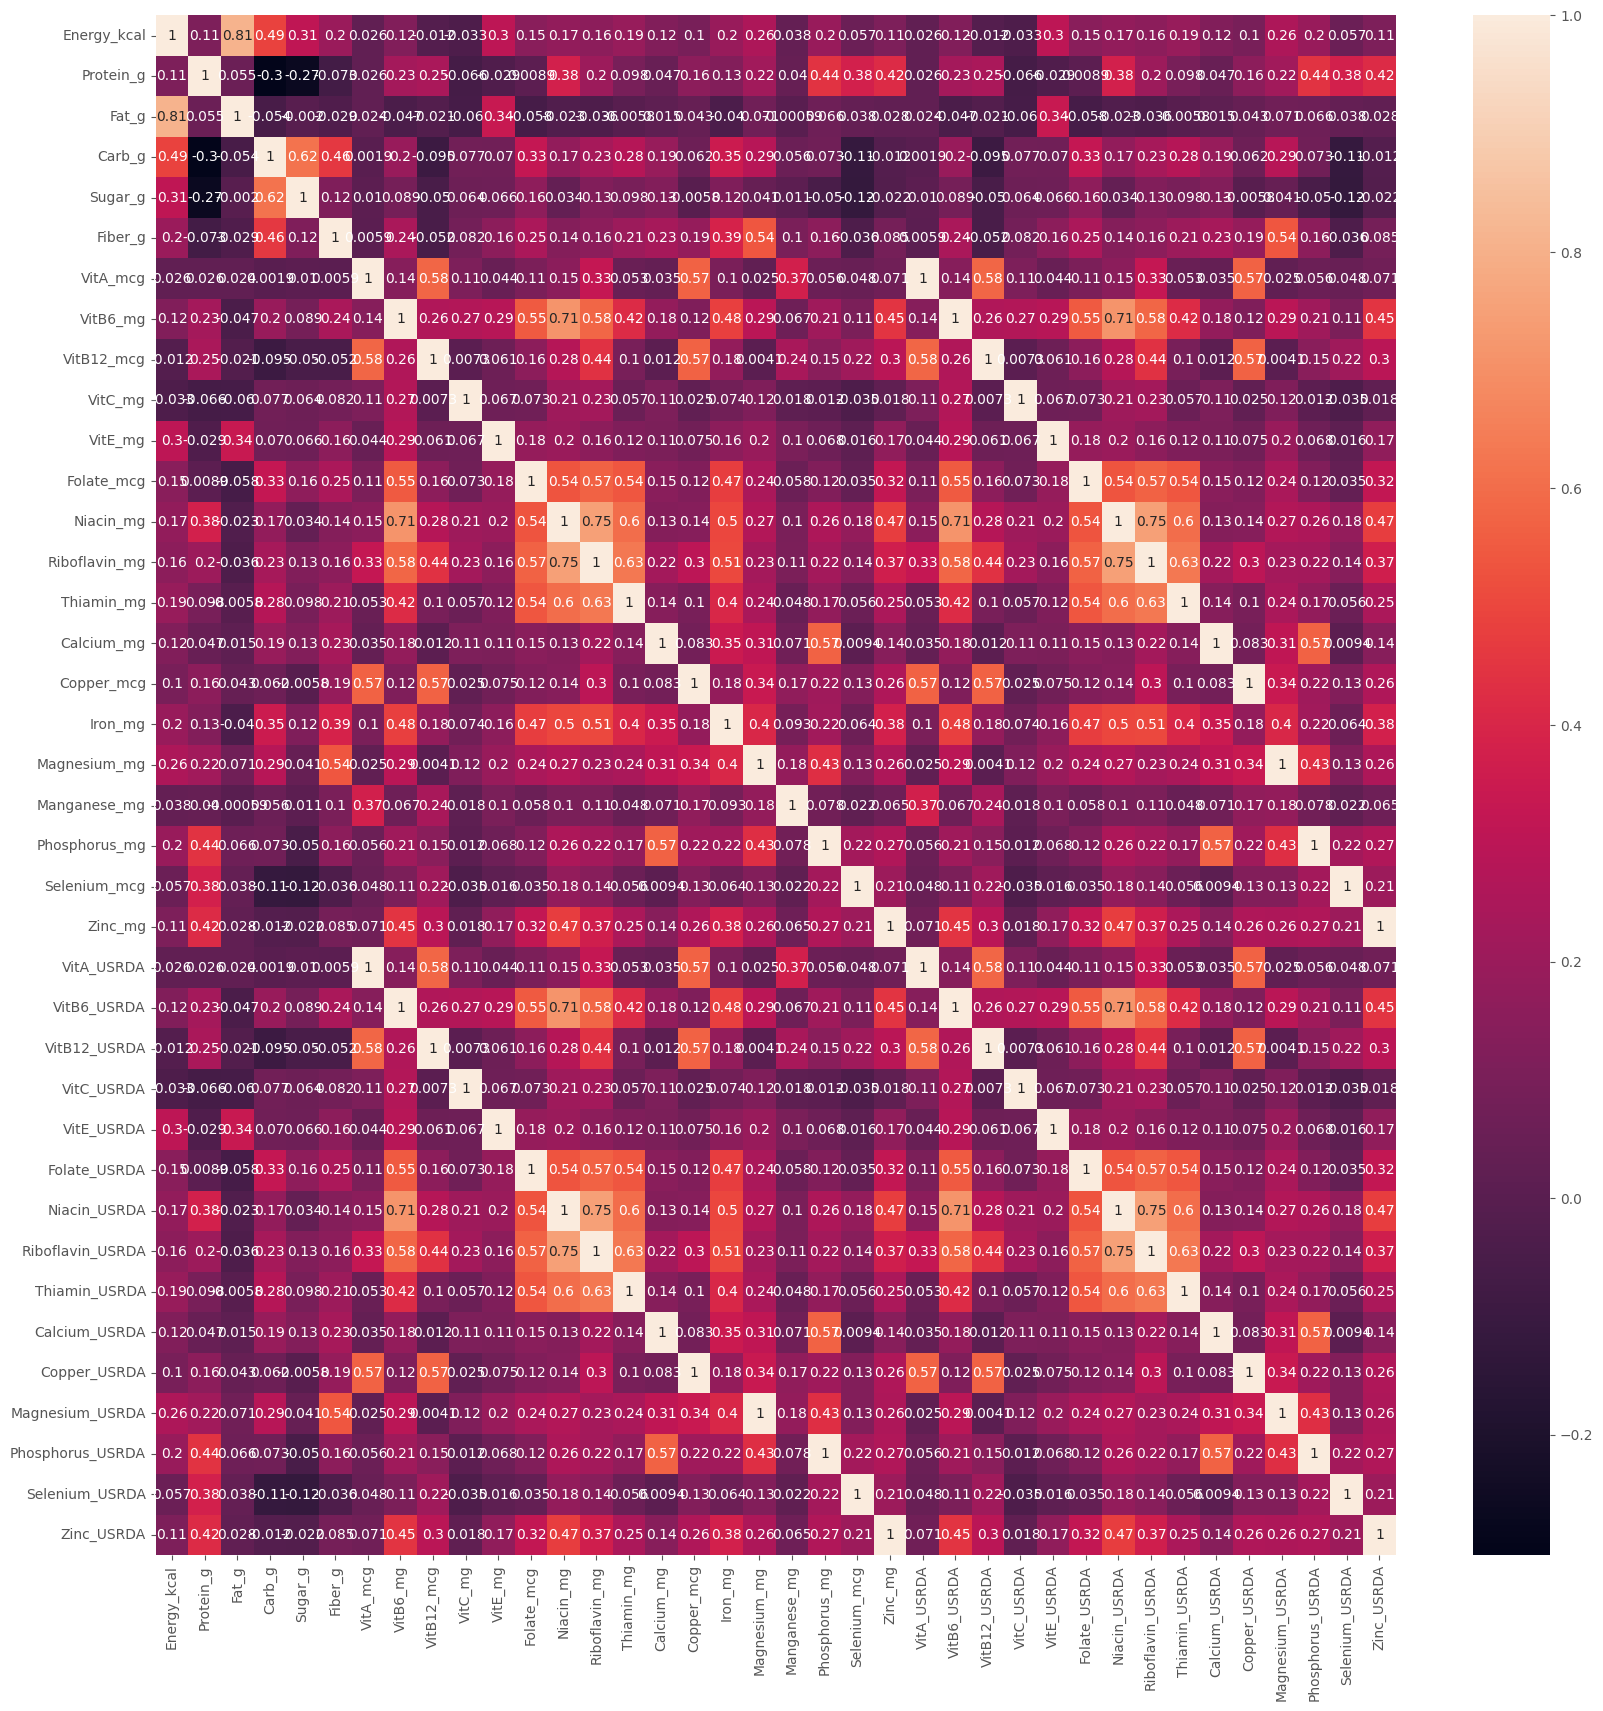

In [164]:
plt.figure(figsize= (20, 20))
sns.heatmap(df[num_col].corr(), annot=True)

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [165]:
list_show = ["VitA_mcg", "VitA_USRDA"]
df[list_show]

,VitA_mcg,VitA_USRDA
0,684.0,0.760000
1,684.0,0.760000
2,840.0,0.933333
3,198.0,0.220000
4,292.0,0.324444
...,...,...
8613,47.0,0.052222
8614,2.0,0.002222
8615,0.0,0.000000
8616,30.0,0.033333


In [166]:
df[list_show].describe()

,VitA_mcg,VitA_USRDA
count,8618.000000,8618.000000
mean,93.968786,0.104410
std,779.362205,0.865958
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.500000,0.001667
75%,21.000000,0.023333
max,30000.000000,33.333333


array([[<Axes: title={'center': 'VitA_mcg'}>,
        <Axes: title={'center': 'VitA_USRDA'}>]], dtype=object)

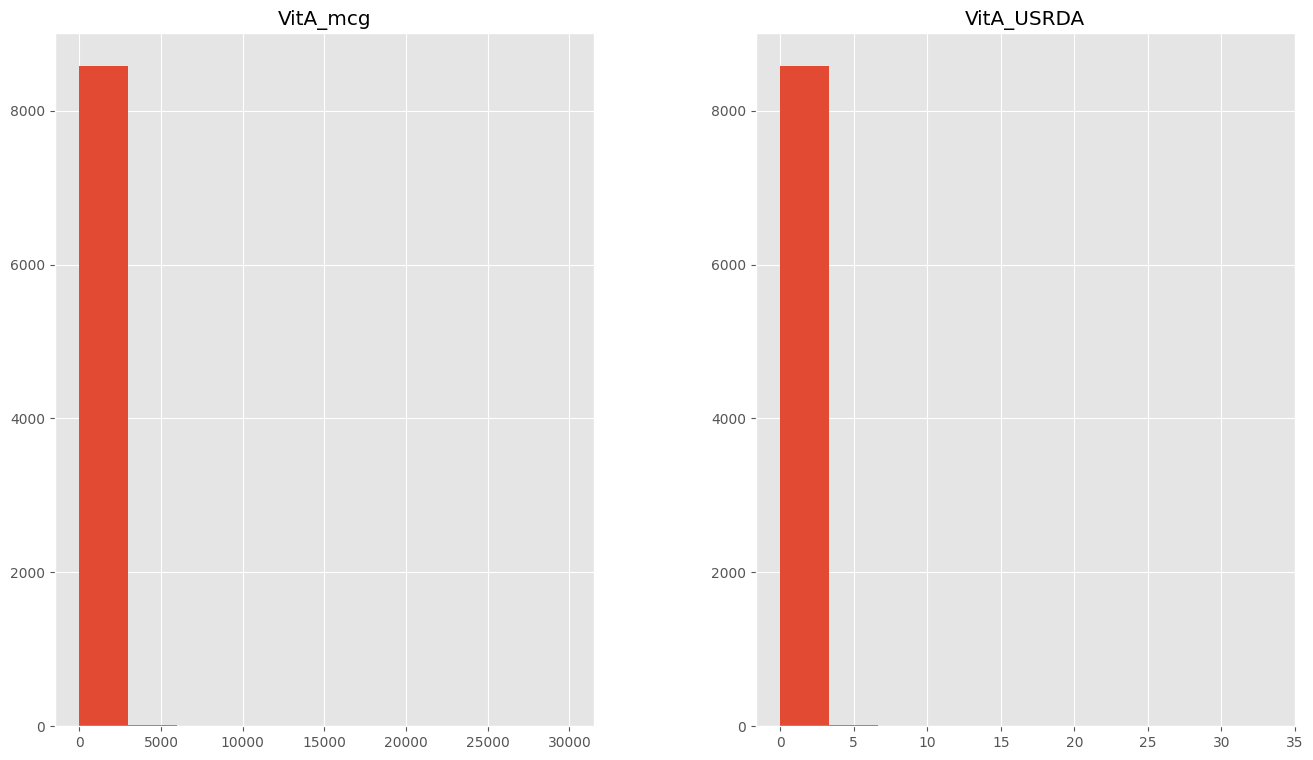

In [167]:
df[list_show].hist()

Parece que la _USRDA es alguna tranformacion de su correcpondiente _mg

Veamos si es recultado de multiplicar por una cantidad.

In [168]:
(df["VitA_mcg"] / df["VitA_USRDA"]).describe()

count    4.633000e+03
mean     9.000000e+02
std      3.961288e-12
min      9.000000e+02
25%      9.000000e+02
50%      9.000000e+02
75%      9.000000e+02
max      9.000000e+02
dtype: float64

En VitA es el resultado de multiplicar por 900.

Vemos con todas las variables

In [169]:
col_mg = ['VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Magnesium_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg']

col_USRDA = ['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA']


In [170]:
for i, valor in enumerate(col_mg):
    print(f"{valor} divido por {col_USRDA[i]} Media: {round(np.mean((df[valor] / df[col_USRDA[i]])), 5)} DVST {round(np.std((df[valor] / df[col_USRDA[i]])), 5)}")
    

VitA_mcg divido por VitA_USRDA Media: 900.0 DVST 0.0
VitB6_mg divido por VitB6_USRDA Media: 1.7 DVST 0.0
VitB12_mcg divido por VitB12_USRDA Media: 2.4 DVST 0.0
VitC_mg divido por VitC_USRDA Media: 90.0 DVST 0.0
VitE_mg divido por VitE_USRDA Media: 15.0 DVST 0.0
Folate_mcg divido por Folate_USRDA Media: 400.0 DVST 0.0
Niacin_mg divido por Niacin_USRDA Media: 16.0 DVST 0.0
Riboflavin_mg divido por Riboflavin_USRDA Media: 1.3 DVST 0.0
Thiamin_mg divido por Thiamin_USRDA Media: 1.2 DVST 0.0
Calcium_mg divido por Calcium_USRDA Media: 1200.0 DVST 0.0
Copper_mcg divido por Copper_USRDA Media: 900.0 DVST 0.0
Magnesium_mg divido por Magnesium_USRDA Media: 420.0 DVST 0.0
Phosphorus_mg divido por Phosphorus_USRDA Media: 700.0 DVST 0.0
Selenium_mcg divido por Selenium_USRDA Media: 55.0 DVST 0.0
Zinc_mg divido por Zinc_USRDA Media: 11.0 DVST 0.0


Efectivamente cada una es el resultado de multiplicar por un valor, uno para cada variable, no es el mismo para todas.

Por lo tanto podemos prescindir de las variables _USRDA con una pérdida de informacion de 0.

In [171]:
col_out = col_out + col_USRDA

In [172]:
num_col = [col for col in df.columns.to_list() if col not in col_out]

In [173]:
num_col

['Energy_kcal',
 'Protein_g',
 'Fat_g',
 'Carb_g',
 'Sugar_g',
 'Fiber_g',
 'VitA_mcg',
 'VitB6_mg',
 'VitB12_mcg',
 'VitC_mg',
 'VitE_mg',
 'Folate_mcg',
 'Niacin_mg',
 'Riboflavin_mg',
 'Thiamin_mg',
 'Calcium_mg',
 'Copper_mcg',
 'Iron_mg',
 'Magnesium_mg',
 'Manganese_mg',
 'Phosphorus_mg',
 'Selenium_mcg',
 'Zinc_mg']

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [174]:
df_sel = df.copy()
df_sel = df_sel.drop(columns=col_out)
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


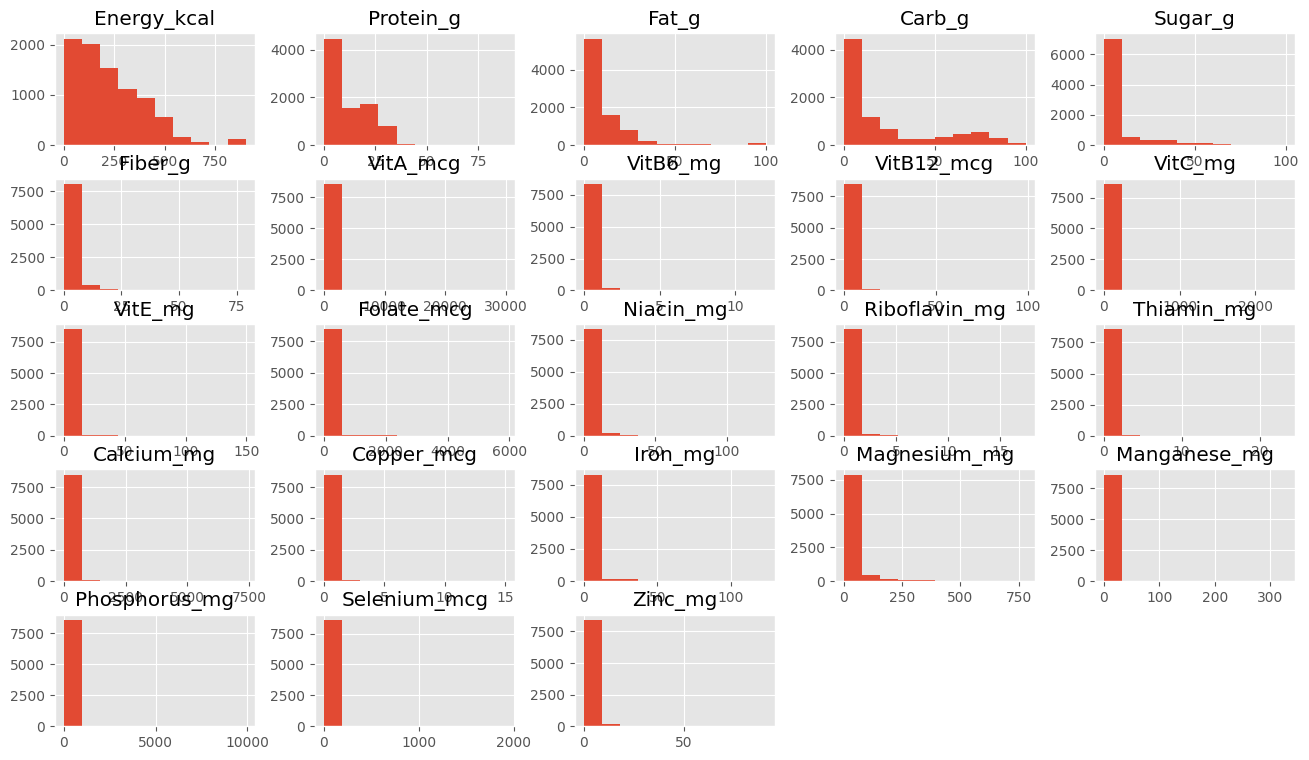

In [175]:
df_sel.hist();

In [176]:
for col in df_sel.columns:
    df_sel[col] = np.log(df_sel[col]+1)

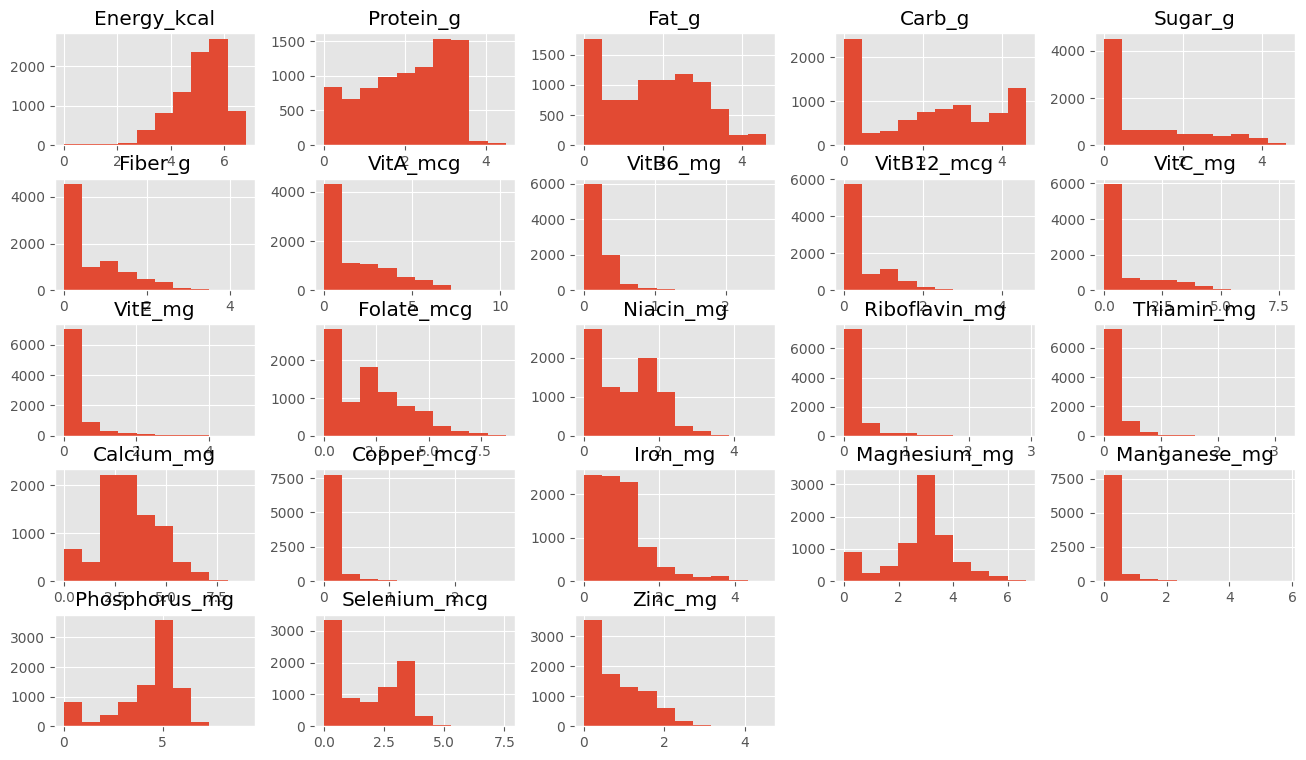

In [177]:
df_sel.hist();

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [178]:
scaler = StandardScaler()
scaler.fit(df_sel)

StandardScaler()

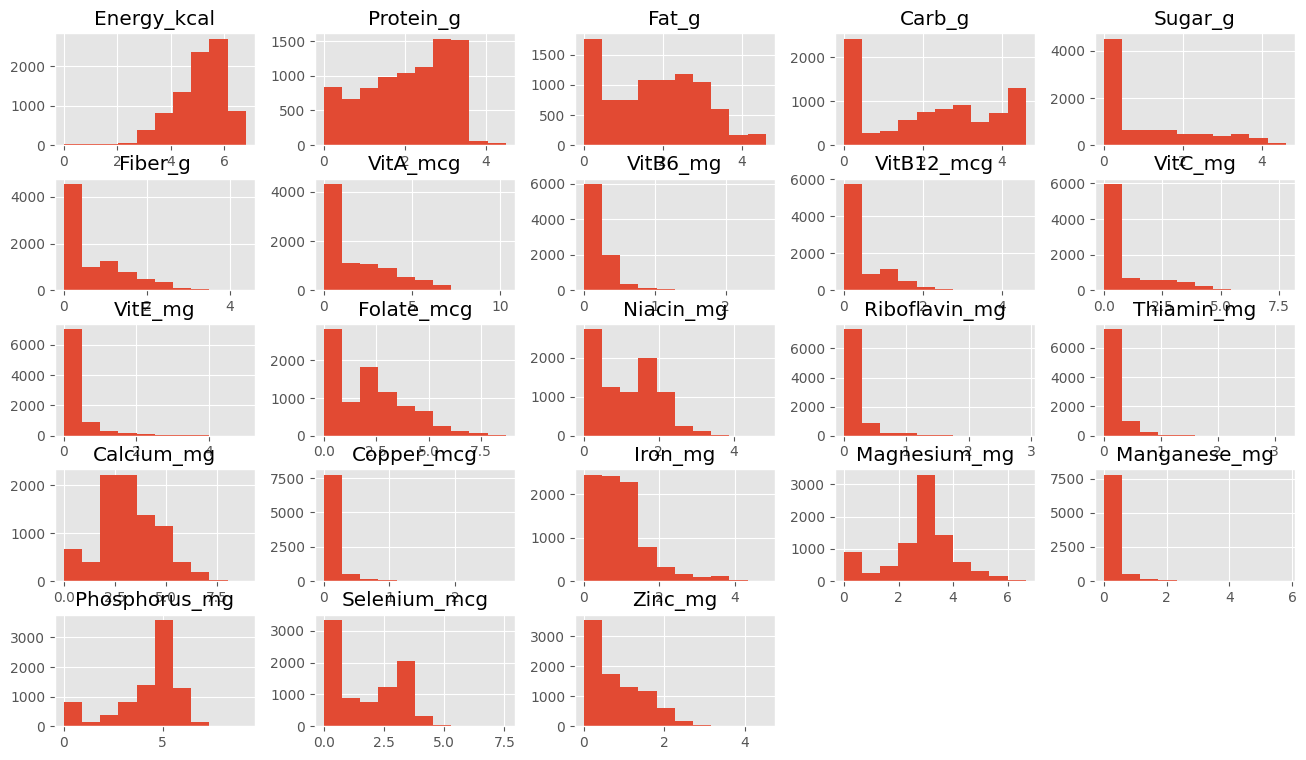

In [179]:
df_sel.hist();

### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [180]:
pca_sel = PCA()
pca_sel.fit(df_sel)
df_sel_pca = pca_sel.transform(df_sel)

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [181]:
pca_sel.components_.shape

(23, 23)

In [182]:
index_PCA = []
for i in range(23):
    index_PCA.append("PC"+str(i))

In [183]:
pd.DataFrame(
    data    = pca_sel.components_, # En components están los autovectores es decir los coeficientes de la PCA
    columns = df_sel.columns,
    index   = index_PCA 
    #index   = ['PC1', 'PC2', 'PC3', 'PC4'] # En ingles pasamos de CP a PC :-) (Principal component)
)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC0,0.131956,0.231489,0.117176,0.028938,-0.030744,0.052250,0.292870,0.042104,0.094991,0.008298,...,0.039858,0.032567,0.295113,0.030582,0.141769,0.351981,0.046601,0.494217,0.324599,0.153095
PC1,-0.061260,-0.255401,-0.183831,0.492750,0.321619,0.177510,0.370309,-0.006145,-0.107063,0.302891,...,0.006156,0.012495,0.230808,0.007262,0.017990,0.016732,0.041648,-0.179002,-0.289937,-0.119569
PC2,-0.219195,-0.046110,-0.089084,-0.442644,-0.216613,-0.206257,0.749404,0.001617,0.084271,0.142594,...,-0.003402,-0.031544,-0.051211,-0.013938,-0.102761,-0.157631,-0.054374,-0.113529,0.070695,-0.023981
PC3,-0.370261,-0.062250,-0.475188,-0.197381,-0.297837,0.005112,-0.368769,0.006384,-0.007084,0.277370,...,-0.012271,-0.009396,-0.074577,0.010848,-0.021237,0.119662,0.028825,-0.042145,0.051344,0.012546
PC4,-0.239572,0.047212,-0.261284,-0.053210,-0.104196,0.013315,-0.086988,-0.025334,-0.060549,0.061640,...,-0.023813,-0.026731,0.644856,-0.007076,-0.058498,0.178431,-0.001945,0.265582,-0.153050,-0.027556
PC5,-0.065519,0.014372,-0.240841,0.076348,0.231502,0.063445,0.082567,0.059788,0.091707,0.365170,...,0.035843,0.033860,-0.571867,0.007268,0.096841,0.272653,-0.011704,0.355296,-0.081175,0.079791
PC6,0.137702,0.089833,0.296522,-0.246757,0.173092,-0.068709,-0.207388,0.062504,0.189644,0.694945,...,0.046793,0.028899,0.259490,0.003744,0.143036,-0.147085,-0.026443,-0.215879,0.012570,0.157804
PC7,0.152595,-0.040300,0.368706,-0.019714,-0.587189,0.158710,0.045448,-0.017204,-0.146670,0.171352,...,-0.027772,-0.001605,-0.118008,0.025162,0.034726,0.204880,0.071439,0.117510,-0.567295,-0.046655
PC8,-0.002050,0.263710,-0.250550,0.164695,-0.289049,0.261750,0.107670,0.106864,0.199039,-0.162820,...,0.102358,0.099307,0.065431,0.026662,0.471193,-0.151678,0.054963,-0.336538,-0.106856,0.166692
PC9,0.142613,-0.081710,0.003036,0.357171,-0.392542,0.131259,0.022608,-0.034749,-0.171387,0.287698,...,-0.038748,-0.015070,-0.042728,0.020790,-0.122633,0.102438,0.094599,-0.200072,0.628380,-0.128812


### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.30666259 0.51938133 0.65077729 0.73508203 0.78890804 0.83050046
 0.8653624  0.896314   0.91735823 0.93614651 0.95121987 0.95986303
 0.96818514 0.97551422 0.98138823 0.9864803  0.9905862  0.9942452
 0.99714545 0.99816641 0.99899837 0.99957463 1.        ]


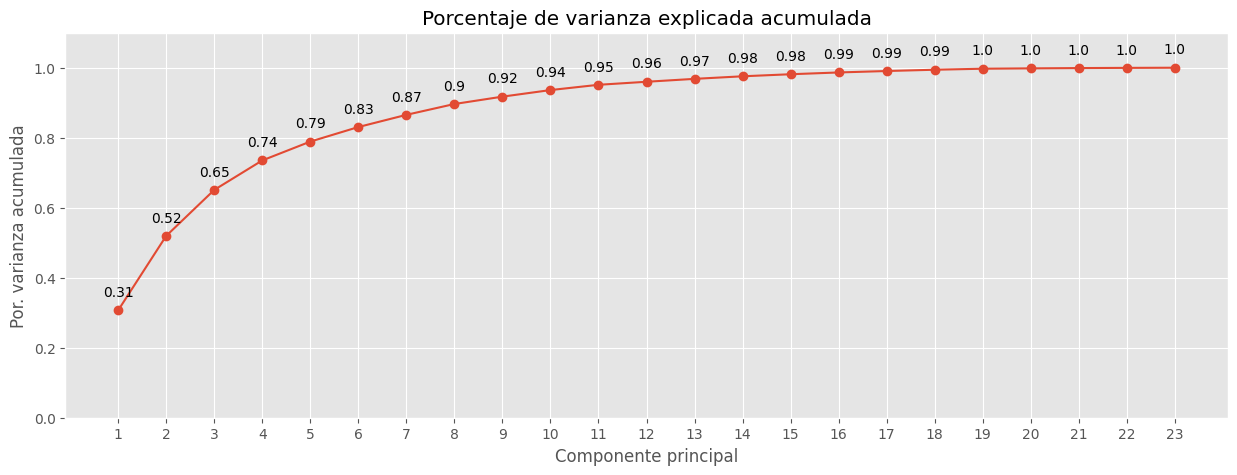

In [184]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_sel.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
ax.plot(
    np.arange(len(df_sel.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_sel.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_sel.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si tuviése que quedarte con 70-75 % de la varianza original, me quedaría con 4 Principal Components

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [185]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_sel.transform(X=df_sel)
df_proyec_4 = pd.DataFrame(
    proyecciones[:,:4],
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = df_sel.index
)
df_proyec_4

,PC1,PC2,PC3,PC4
0,-0.657035,0.422264,4.790774,-3.637714
1,-0.667332,0.440361,4.779718,-3.638660
2,-3.229269,0.281916,5.439160,-4.517720
3,4.324562,0.188210,2.569800,-1.710885
4,4.298475,0.309288,2.808229,-2.221201
...,...,...,...,...
8613,3.836340,-2.232901,2.421613,-0.881552
8614,1.583748,-1.758255,-0.077090,1.658204
8615,-4.027257,2.204510,-2.434095,-1.255995
8616,2.403023,-1.322774,1.725372,0.453754


In [186]:
df_proyec_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     8618 non-null   float64
 1   PC2     8618 non-null   float64
 2   PC3     8618 non-null   float64
 3   PC4     8618 non-null   float64
dtypes: float64(4)
memory usage: 269.4 KB
